## Precipitation in Wausau, WI (1943-2023)
I chose to do this analysis for Wausau because my family is from northern Wisconsin and this is the station nearest their home. My mom her twin sister were born in August so I decided to look at precipitation to see which years were the wettest and driest in the month of August.

In [1]:
# Import Python libraries
import pandas as pd
#import hvplot.pandas
#import holoviews as hv
#from holoviews import dim, opts
#hv.extension('bokeh', 'matplotlib')
import matplotlib.pyplot as plt

#import warnings

#warnings.filterwarnings('ignore')

In [2]:
# Define link to data
wausau_precip_url = ('https://www.ncei.noaa.gov/access/monitoring/'
              'climate-at-a-glance/city/time-series/USW00014897/'
              'pcp/1/8/1895-2023.csv')
wausau_precip_url

'https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USW00014897/pcp/1/8/1895-2023.csv'

In [3]:
# Open and clean data using pandas 
wausau_aug_precip_df = pd.read_csv(wausau_precip_url, 
                                   header=3, 
                                   names=['year', 'precip_in'],
                                   na_values=['-99'])
wausau_aug_precip_df

,year,precip_in
0,194308,3.61
1,194408,4.37
2,194508,NaN
3,194608,2.64
4,194708,6.94
...,...,...
76,201908,3.12
77,202008,1.86
78,202108,9.60
79,202208,4.66


<Axes: xlabel='year'>

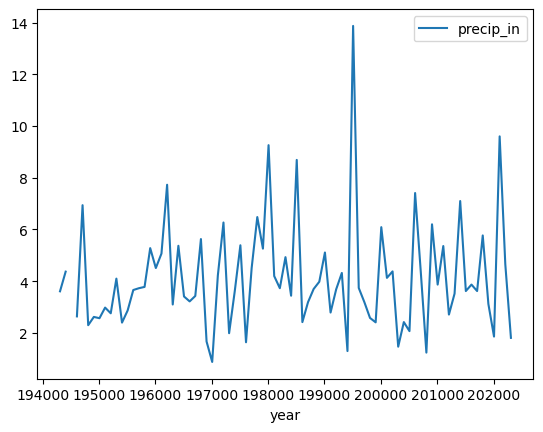

In [4]:
# Plot data using pandas
wausau_aug_precip_df.plot(x='year', y='precip_in')

In [5]:
# Clean up year colum to only display year
wausau_aug_precip_df.year = pd.to_datetime(wausau_aug_precip_df.year, format='%Y%m').dt.year

print([round(val, 2) for val in wausau_aug_precip_df.mean().values])
wausau_aug_precip_df

[1983.0, 4.14]


,year,precip_in
0,1943,3.61
1,1944,4.37
2,1945,NaN
3,1946,2.64
4,1947,6.94
...,...,...
76,2019,3.12
77,2020,1.86
78,2021,9.60
79,2022,4.66


In [6]:
# Find min and max Aug precip values
print("The minimum August precip in Wausau, WI was:", wausau_aug_precip_df.min()),
print("The maximum August precip in Wausau, WI was:", wausau_aug_precip_df.max())

The minimum August precip in Wausau, WI was: year         1943.00
precip_in       0.88
dtype: float64
The maximum August precip in Wausau, WI was: year         2023.00
precip_in      13.87
dtype: float64


In [7]:
# What is length of df (how many rows?)
print("There are", len(wausau_aug_precip_df), "entries in this dataframe")

There are 81 entries in this dataframe


In [77]:
# NOTE: 81 enties beginning in 1943 (entry 0); entry 52 would be 1995 - where max occurs 
# What is the value of the df @ row 52 (aka 1995)?
wausau_aug_precip_df.iloc[52,:]

year         1995.00
precip_in      13.87
Name: 52, dtype: float64

## 1995 Was Wausau's Wettest August (13.87")

In [7]:
wausau_precip_reindex = pd.read_csv(wausau_precip_url,
                                    header=3,
                                    names=['year','precip_in'],
                                    #index_col=['year'],
                                    parse_dates=True,
                                    na_values=['-99'])
wausau_precip_reindex

,year,precip_in
0,194308,3.61
1,194408,4.37
2,194508,NaN
3,194608,2.64
4,194708,6.94
...,...,...
76,201908,3.12
77,202008,1.86
78,202108,9.60
79,202208,4.66


In [8]:
wausau_precip_reindex['year'] = wausau_precip_reindex['year']//100
wausau_precip_reindex

,year,precip_in
0,1943,3.61
1,1944,4.37
2,1945,NaN
3,1946,2.64
4,1947,6.94
...,...,...
76,2019,3.12
77,2020,1.86
78,2021,9.60
79,2022,4.66


In [9]:
wausau_precip_reindex.set_index('year')

,precip_in
year,
1943,3.61
1944,4.37
1945,NaN
1946,2.64
1947,6.94
...,...
2019,3.12
2020,1.86
2021,9.60


<function matplotlib.pyplot.show(close=None, block=None)>

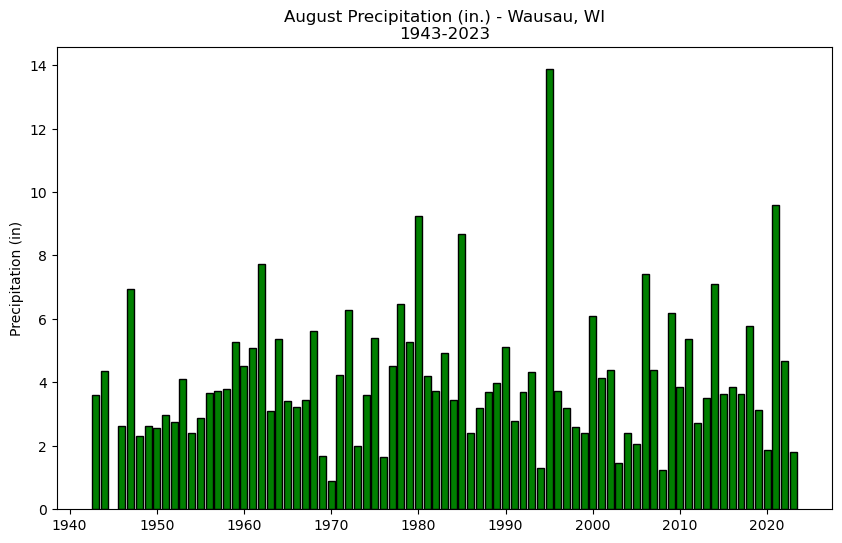

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(wausau_precip_reindex['year'],
       wausau_precip_reindex['precip_in'],
       color='green',
       edgecolor='black')
ax.set(ylabel='Precipitation (in)')
plt.title('August Precipitation (in.) - Wausau, WI\n1943-2023')
plt.show

In [12]:


wausau_plot = wausau_aug_precip_df.hvplot(x='year',
                  y='precip_in',
                  title='August Precipitation (inches) in Wausau, WI (1943-2023)',
                  ylabel='Precipitation (Inches)',
                  xlabel='Year',
                  kind='bar',
                  color='green')
wausau_plot.opts(xrotation=45, 
                 width=1400, 
                 height=400)
wausau_plot

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [10]:
%%capture
%%bash
jupyter nbconvert wausau-precip.ipynb --to html